In [1]:
import numpy as np
import math
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from scipy.spatial.distance import squareform
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
save_path = ""

#### RSA theoretical matrices - 4vs12 at sequence offset

In [3]:
cond_instr_8 = ['fMc', 'fMv', 'fLc', 'fLv','tSc', 'tSv', 'tMc', 'tMv']

num_dict = {'fMc':4, 'fLc':4, 'tSc':12, 'tMc':12,
             'fMv':4, 'fLv':4, 'tSv':12, 'tMv':12}
num_dist = []
for c1 in range(len(cond_instr_8)-1):
    for c2 in range(min(c1 + 1, len(cond_instr_8)-1), len(cond_instr_8)):
        #print(cond_instr_8[c1], cond_instr_8[c2])
        pair_dist = abs(math.log10(num_dict[cond_instr_8[c1]]) - math.log10(num_dict[cond_instr_8[c2]]))
        num_dist.append(pair_dist)
#np.save(save_path+"number_DM_8cond", arr=np.asarray(num_dist))

rate_dict = {'fMc':5.56, 'fLc':1.85, 'tSc':16.67, 'tMc':5.56,
             'fMv':5.56, 'fLv':1.85, 'tSv':16.67, 'tMv':5.56}
rate_dist = []
for c1 in range(len(cond_instr_8)-1):
    for c2 in range(min(c1 + 1, len(cond_instr_8)-1), len(cond_instr_8)):
        pair_dist = abs(math.log10(rate_dict[cond_instr_8[c1]]) - math.log10(rate_dict[cond_instr_8[c2]]))
        rate_dist.append(pair_dist)
#np.save(save_path+"rate_DM_8cond", arr=np.asarray(rate_dist))

dur_dict = { 'fMc':720, 'fLc':2160, 'tSc':720, 'tMc':2160,
           'fMv':720, 'fLv':2160, 'tSv':720, 'tMv':2160}
dur_dist = []
for c1 in range(len(cond_instr_8)-1):
    for c2 in range(min(c1 + 1, len(cond_instr_8)-1), len(cond_instr_8)):
        pair_dist = abs(math.log10(dur_dict[cond_instr_8[c1]]) - math.log10(dur_dict[cond_instr_8[c2]]))
        dur_dist.append(pair_dist)
#np.save(save_path+"duration_DM_8cond", arr=np.asarray(dur_dist))

In [4]:
## check for correlations
features = np.stack((num_dist, rate_dist, dur_dist), axis=1)
# standardize since this will be needed later in the analysis 
std_features = StandardScaler().fit_transform(features)
std_features_df= pd.DataFrame(std_features, columns = ['num', 'rate', 'dur'])
corr = std_features_df.corr()
corr

,num,rate,dur
num,1.000000,0.258199,-0.166667
rate,0.258199,1.000000,0.258199
dur,-0.166667,0.258199,1.000000


In [5]:
## check for multicollinearity with VIF
vif_data = pd.DataFrame() 
vif_data["feature"] = std_features_df.columns 
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(std_features_df.values, i) 
                          for i in range(len(std_features_df.columns))] 
vif_data

,feature,VIF
0,num,1.142857
1,rate,1.190476
2,dur,1.142857


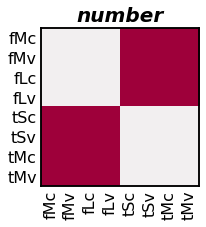

In [6]:
## example plot
sns.set_context("talk", rc={'xtick.labelsize': '16.0','ytick.labelsize': '16.0'})

num_matrix = squareform(num_dist)

fig, ax = plt.subplots(figsize=(4.,3.5))
im = ax.matshow(num_matrix, cmap=sns.light_palette('xkcd:cranberry', as_cmap=True)) 

ax.set_yticks(range(len(cond_instr_8)))
ax.set_yticklabels(cond_instr_8)
ax.set_xticks(range(len(cond_instr_8)))
ax.set_xticklabels(cond_instr_8, rotation = 90)

ax.xaxis.set_ticks_position('bottom')
plt.tick_params( pad=-5, which='both', bottom=False, left=False ) # labels along the bottom edge are on

ax.set_title("number", fontsize=20, style="italic", weight='bold', color='k', y=1.0)

plt.tight_layout()